In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('../MachineLearning/datasets/diabetes2.csv')

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
zero_not_accept=['Glucose','BloodPressure','SkinThickness','BMI','Insulin']

for column in zero_not_accept:
    df[column]=df[column].replace(0,np.nan)
    mean=int(df[column].mean(skipna=True))
    df[column]=df[column].replace(np.nan,mean)

In [6]:
X=df.iloc[:,:-1]

In [7]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,155.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,29.0,155.0,30.1,0.349,47


In [8]:
Y=df.iloc[:,-1]

In [9]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [12]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)


In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.75

[Text(0.5, 0.875, 'X[1] <= 0.06\nentropy = 0.941\nsamples = 576\nvalue = [370, 206]'),
 Text(0.25, 0.625, 'X[5] <= -0.873\nentropy = 0.685\nsamples = 329\nvalue = [269, 60]'),
 Text(0.125, 0.375, 'X[4] <= -1.257\nentropy = 0.091\nsamples = 86\nvalue = [85, 1]'),
 Text(0.0625, 0.125, 'entropy = 0.544\nsamples = 8\nvalue = [7, 1]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 78\nvalue = [78, 0]'),
 Text(0.375, 0.375, 'X[7] <= -0.403\nentropy = 0.8\nsamples = 243\nvalue = [184, 59]'),
 Text(0.3125, 0.125, 'entropy = 0.533\nsamples = 132\nvalue = [116, 16]'),
 Text(0.4375, 0.125, 'entropy = 0.963\nsamples = 111\nvalue = [68, 43]'),
 Text(0.75, 0.625, 'X[5] <= -0.364\nentropy = 0.976\nsamples = 247\nvalue = [101, 146]'),
 Text(0.625, 0.375, 'X[7] <= -0.616\nentropy = 0.866\nsamples = 66\nvalue = [47, 19]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.6875, 0.125, 'entropy = 0.973\nsamples = 47\nvalue = [28, 19]'),
 Text(0.875, 0.375, 'X[1] <= 1.178\nent

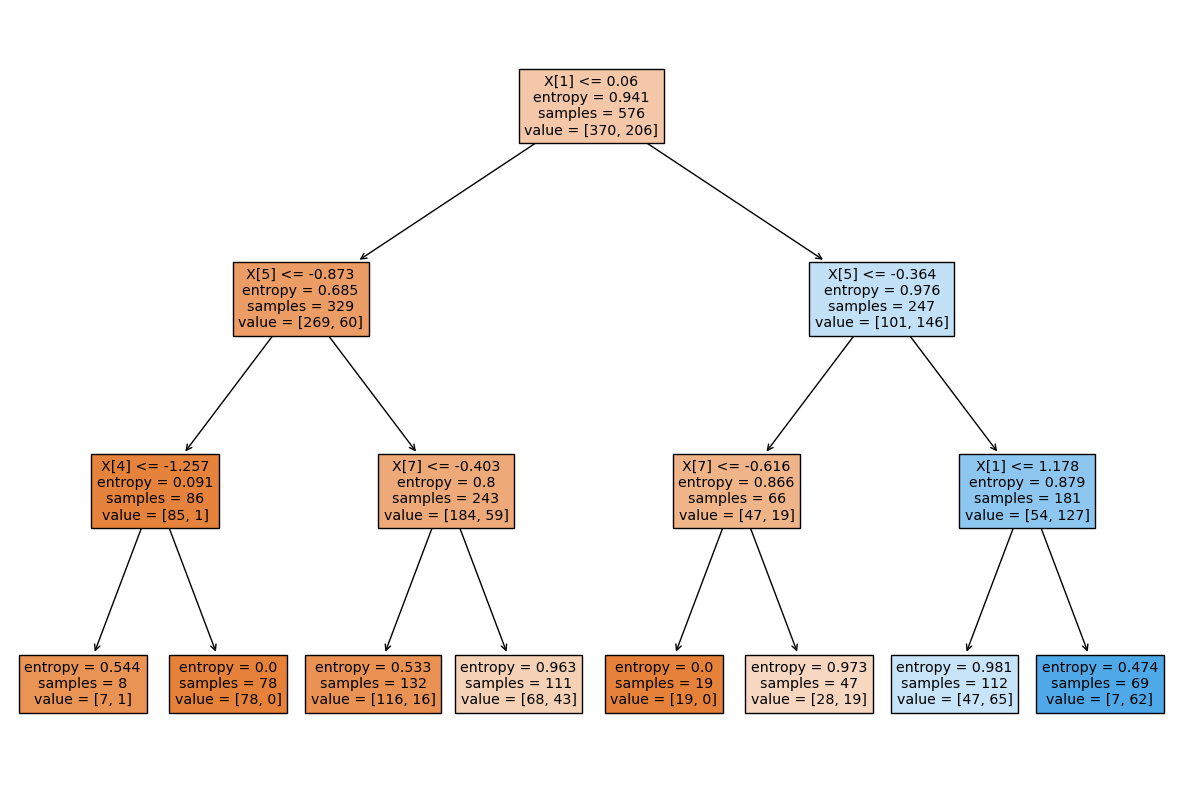

In [14]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)